<img src="https://seeklogo.com/images/R/Roche-logo-A80FCF9553-seeklogo.com.png" style="width:120px;height:70px">

# Roche Data Science - Home Study Case

By: Johnny Sin

Date: July 7-10, 2023

# Outline of the Project

## 1. Project Information
**Scenario**: Working as a Data Scientist and asked by Digital Transformation Managing Partner Simon to start a project that uses data collected on stroke patients over the past few years.

**About this Company:**
>developing innovative treatments for stroke, with an average of 11K patients helped annually.

## 2. Describing the data providing

Feature Information:
1. ID: Unique Identification Number
2. Gender: Male / Female / Other (Categorical Variable)
3. Age_In_Days: Indicates patient's age in days (numerical variable)
4. Hypertension: 1 - has hypertension | 0 - no hypertension (binomial variable)
5. Heart_Disease: 1 - has heart disease | 0 - no heart disease (binomial variable)
6. Ever_married: Yes - patient is / was ever married | No - patient has never been married (binomial variable)
7. Type_Of_Work: working status, 'self-employed', 'works in private firm', 'government job', 'still a child' (categorical variable)
8. Residence: Urban - patient currently lives in urban | Rural - patient lives in rural area (binomial variable)
9. Avg_Glucose: patient's average glucose level for the past 3 months
10. BMI: patient's current BMI score
11. Smoking_Status: indication of smoking habits (categorical variable)
12. **TARGET** Stroke: 1 - patient after stroke | 0 - no stroke (binomial variable)

Already looking at the features of the dataset, I will be using various classification algorithms for this project

## 3. Exploratory Data / Statistical Analysis

Here I will be looking at the various data descriptions and also perform some minor feature engineering, along with figuring out the autocorrelative/multicollinearity of the features. 

### 3. 1 First importing the libraries / tools

In [150]:
# importing the necessary libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
%matplotlib inline

# importing the scikit-learn tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# importing the estimators to test
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# importing the sklearn metrics for evaluation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [151]:
# importing the dataset
pd.set_option('display.max_columns', None)

df_main = pd.read_csv('Stroke_Prediction.csv', low_memory=False)
df_main.head(10)

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,57008,Female,25578.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46657,Male,5128.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32444,Female,17177.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,53725,Female,18995.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41553,Female,27413.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,16167,Female,11689.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,29111,Female,27036.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [152]:
# creating a copy of the original data for our working dataset
df = df_main.copy()

# looking at the features in single view
df.head().T

,0,1,2,3,4
ID,31153,30650,17412,57008,46657
Gender,Male,Male,Female,Female,Male
Age_In_Days,1104.0,21204.0,2928.0,25578.0,5128.0
Hypertension,0,1,0,0,0
Heart_Disease,0,0,0,0,0
Ever_Married,No,Yes,No,Yes,No
Type_Of_Work,children,Private,Private,Private,Never_worked
Residence,Rural,Urban,Urban,Rural,Rural
Avg_Glucose,95.12,87.96,110.89,69.04,161.28
BMI,18.0,39.2,17.6,35.9,19.1


### 3.2 Checking out the data information and more details

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              43400 non-null  int64  
 1   Gender          43400 non-null  object 
 2   Age_In_Days     43400 non-null  float64
 3   Hypertension    43400 non-null  int64  
 4   Heart_Disease   43400 non-null  int64  
 5   Ever_Married    43400 non-null  object 
 6   Type_Of_Work    43400 non-null  object 
 7   Residence       43400 non-null  object 
 8   Avg_Glucose     43400 non-null  float64
 9   BMI             41938 non-null  float64
 10  Smoking_Status  30108 non-null  object 
 11  Stroke          43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [154]:
df.describe()

,ID,Age_In_Days,Hypertension,Heart_Disease,Avg_Glucose,BMI,Stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36875.482604,15446.234931,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.890037,8334.882942,0.291235,0.212733,43.111751,7.770020,0.133103
min,176.000000,-16381.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18594.250000,8789.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36908.000000,16074.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,55054.250000,21923.250000,0.000000,0.000000,112.070000,32.900000,0.000000
max,73899.000000,264301.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
df.shape

(43400, 12)

Since we have less than 100K samples, for this study we will not be using SGD or Kernel approximation estimators

In [7]:
# Creating a categorical features list
cat_features = []
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        cat_features.append(label)
    
    
# creating a numerical features list
float_features = []
for label, content in df.items():
    if pd.api.types.is_float_dtype(content):
        float_features.append(label)
        
# creating a features list for already encoded features
int_features = []
for label, content in df.items():
    if pd.api.types.is_int64_dtype(content):
        int_features.append(label)

In [8]:
print(f' Categorical features are: {cat_features}, \n Numerical features are {float_features}, \n Encoded features are {int_features}')

 Categorical features are: ['Gender', 'Ever_Married', 'Type_Of_Work', 'Residence', 'Smoking_Status'], 
 Numerical features are ['Age_In_Days', 'Avg_Glucose', 'BMI'], 
 Encoded features are ['ID', 'Hypertension', 'Heart_Disease', 'Stroke']


### 3.3 Encoding the categorical features into Int64 values

In [155]:
for columns in cat_features:
    print(df[columns].value_counts(), '\n')

Gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64 

Ever_Married
Yes    27938
No     15462
Name: count, dtype: int64 

Type_Of_Work
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64 

Residence
Urban    21756
Rural    21644
Name: count, dtype: int64 

Smoking_Status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64 



In [156]:
# Manually Encoding features for visualization
df_tmp = df.copy()

# Encoding the Gender Column
df_tmp['Gender'] = df_tmp['Gender'].map({'Female': 0,
                                'Male': 1,
                                'Other': 2})
# Encoding the Ever_Married Column
df_tmp['Ever_Married'] = df_tmp['Ever_Married'].map({'Yes': 0,
                                                    'No': 1})
# Encoding the Type_Of_Work Column
df_tmp['Type_Of_Work'] = df_tmp['Type_Of_Work'].map({'Private': 0,
                                                    'Self-employed': 1,
                                                    'children': 2,
                                                    'Govt_job': 3,
                                                    'Never_worked': 4})
# Encoding the Residence Column
df_tmp['Residence'] = df_tmp['Residence'].map({'Urban': 0,
                                              'Rural': 1})
# Encoding the Smoking_Status Column
df_tmp['Smoking_Status'] = df_tmp['Smoking_Status'].map({'never smoked': 0,
                                                        'formerly smoked': 1,
                                                        'smokes': 2})

## I will be dropping the ID column because it is irrelevant:
df_tmp.drop('ID', axis = 1, inplace = True)

## I will also be replacing the 'Stroke' column name with 'Target'
df_tmp.rename({'Stroke': 'Target'}, axis = 1, inplace = True)

In [157]:
df_tmp.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
0,1,1104.0,0,0,1,2,1,95.12,18.0,NaN,0
1,1,21204.0,1,0,0,0,0,87.96,39.2,0.0,0
2,0,2928.0,0,0,1,0,0,110.89,17.6,NaN,0
3,0,25578.0,0,0,0,0,1,69.04,35.9,1.0,0
4,1,5128.0,0,0,1,4,1,161.28,19.1,NaN,0


### 3.4 Checking for Null Values

In [12]:
df_tmp.isna().sum().sort_values(ascending=False)

Smoking_Status    13292
BMI                1462
Gender                0
Age_In_Days           0
Hypertension          0
Heart_Disease         0
Ever_Married          0
Type_Of_Work          0
Residence             0
Avg_Glucose           0
Target                0
dtype: int64

In [13]:
df_tmp.isna().sum().sort_values(ascending=False) / len(df_tmp)

Smoking_Status    0.306267
BMI               0.033687
Gender            0.000000
Age_In_Days       0.000000
Hypertension      0.000000
Heart_Disease     0.000000
Ever_Married      0.000000
Type_Of_Work      0.000000
Residence         0.000000
Avg_Glucose       0.000000
Target            0.000000
dtype: float64

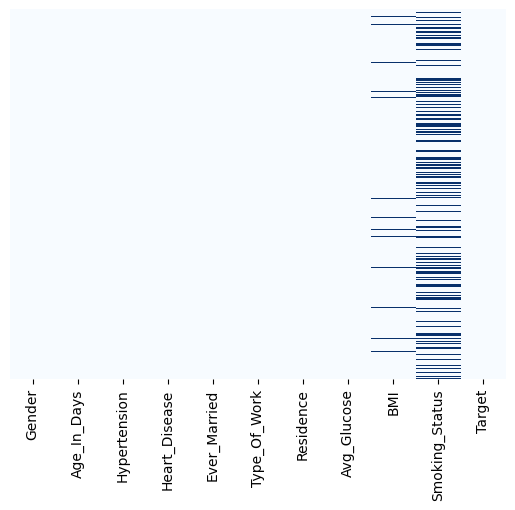

In [158]:
# visualizing the amount of rows that are deemed missing 
sns.heatmap(df_tmp.isnull(),yticklabels=False,cbar=False,cmap='Blues');

Because almost 30 percent of the data is missing for the Smoking_status we can either:
1. impute the missing values with the mode
2. exclude the samples with missing values
3. **create a third category called "unknown"** 
Because the first two methods are rather extreme, we will choose the third method

*For the BMI we can simply exclude the samples without BMI recording, since only 3 percent of the samples have missing data*


In [15]:
# first seeing if there is any crucial data inconsistencies when removing all the BMI rows
df_bmi_missing = df[df.BMI.isna()]
df_bmi_missing.head()
df_bmi_missing['Stroke'].value_counts(), df_bmi_missing['Gender'].value_counts()

(Stroke
 0    1322
 1     140
 Name: count, dtype: int64,
 Gender
 Male      738
 Female    720
 Other       4
 Name: count, dtype: int64)

In [16]:
# dropping the missing values
df_tmp.dropna(subset=['BMI'], inplace = True)
df_tmp.isna().sum()

Gender                0
Age_In_Days           0
Hypertension          0
Heart_Disease         0
Ever_Married          0
Type_Of_Work          0
Residence             0
Avg_Glucose           0
BMI                   0
Smoking_Status    12866
Target                0
dtype: int64

In [17]:
# creating a new column for the Smoking_Status missing values column:
df_tmp['Smoking_Status'] = df_tmp['Smoking_Status'].fillna(3)
df_tmp['Smoking_Status'].value_counts()

Smoking_Status
0.0    15747
3.0    12866
1.0     7099
2.0     6226
Name: count, dtype: int64

In [18]:
print(f'The current dataframe is now: {len(df_tmp) / len(df_main) *100:.2f}% of the original dataframe')

The current dataframe is now: 96.63% of the original dataframe


### 3.5 Data visualization
Now that we imputed the missing values, encoded the categorical features, and created a new dataframe `df_dropped` we can start finding correlations between the features

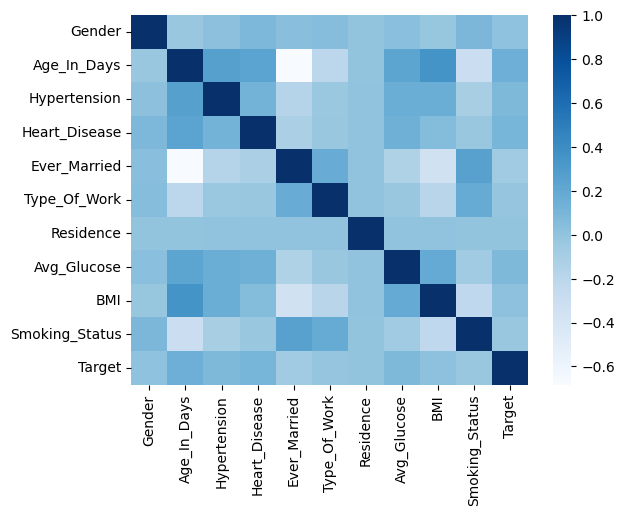

In [19]:
# Creating a correlation matrix
corr_matrix = df_tmp.corr()
corr_plot = sns.heatmap(corr_matrix,
                        annot = False,
                       cmap = 'Blues')
corr_plot;

In [20]:
# creating a correlation matrix using the dataframe to see the coefficients annotated
corr_pd = corr_matrix.style.background_gradient(cmap = 'Blues')
corr_pd.to_excel('./corr_pd.xlsx', index = False)
corr_pd

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
Gender,1.000000,-0.031164,0.021353,0.080076,0.034772,0.046757,-0.002894,0.031903,-0.021981,0.089688,0.010015
Age_In_Days,-0.031164,1.000000,0.264162,0.239200,-0.682833,-0.206336,-0.000866,0.228067,0.353383,-0.303425,0.145440
Hypertension,0.021353,0.264162,1.000000,0.120806,-0.173041,-0.035075,0.001192,0.159130,0.161225,-0.103855,0.079479
Heart_Disease,0.080076,0.239200,0.120806,1.000000,-0.123489,-0.026938,0.004111,0.143555,0.057677,-0.026426,0.111102
Ever_Married,0.034772,-0.682833,-0.173041,-0.123489,1.000000,0.177889,0.004829,-0.148817,-0.342281,0.257022,-0.066794
Type_Of_Work,0.046757,-0.206336,-0.035075,-0.026938,0.177889,1.000000,0.004746,-0.027594,-0.183896,0.182125,-0.017008
Residence,-0.002894,-0.000866,0.001192,0.004111,0.004829,0.004746,1.000000,0.001154,0.003749,0.000303,-0.002315
Avg_Glucose,0.031903,0.228067,0.159130,0.143555,-0.148817,-0.027594,0.001154,1.000000,0.191295,-0.071360,0.077227
BMI,-0.021981,0.353383,0.161225,0.057677,-0.342281,-0.183896,0.003749,0.191295,1.000000,-0.229165,0.020285
Smoking_Status,0.089688,-0.303425,-0.103855,-0.026426,0.257022,0.182125,0.000303,-0.071360,-0.229165,1.000000,-0.031059


In [21]:
df_agg = df_tmp.groupby('Target').mean()
df_agg

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status
Target,,,,,,,,,,
0,0.404746,15158.197080,0.084708,0.040295,0.365347,0.837632,0.499310,103.225697,28.585371,1.391452
1,0.444790,25011.934681,0.267496,0.223950,0.104199,0.684292,0.489891,129.767823,29.868118,1.071540


Seeing how maybe Hypertension and Heart Disease might be correlated, I'll look more into this

In [22]:
# creating a function for visualizing all the value counts:
def plot_features_value_counts(data, target_column = 'Target'):
    '''
    A function displays the value counts of every feature (10 columns) excluding the target
    '''
    # selecting only the dependent features
    data_X = data.drop(target_column, axis = 1)
    
    # setting up the figure
    fig = plt.figure(figsize = (20,10))
    # looping through 10 (for displaying 10 figures)
    for i, columns in enumerate(list(data_X.columns)):
        # create subplots (5 per row)
        ax = plt.subplot(2, 5, i+1)
        
        # Display the plot
        if pd.api.types.is_float_dtype(data_X[columns]):
            data_X[columns].plot.hist()
            plt.title(f'Histogram: {columns}')
        else:
            data_X[columns].value_counts().plot(kind='bar')
            plt.title(f'Value Counts: {columns}')
        
    fig.suptitle('Comprehensive Features Plot')          

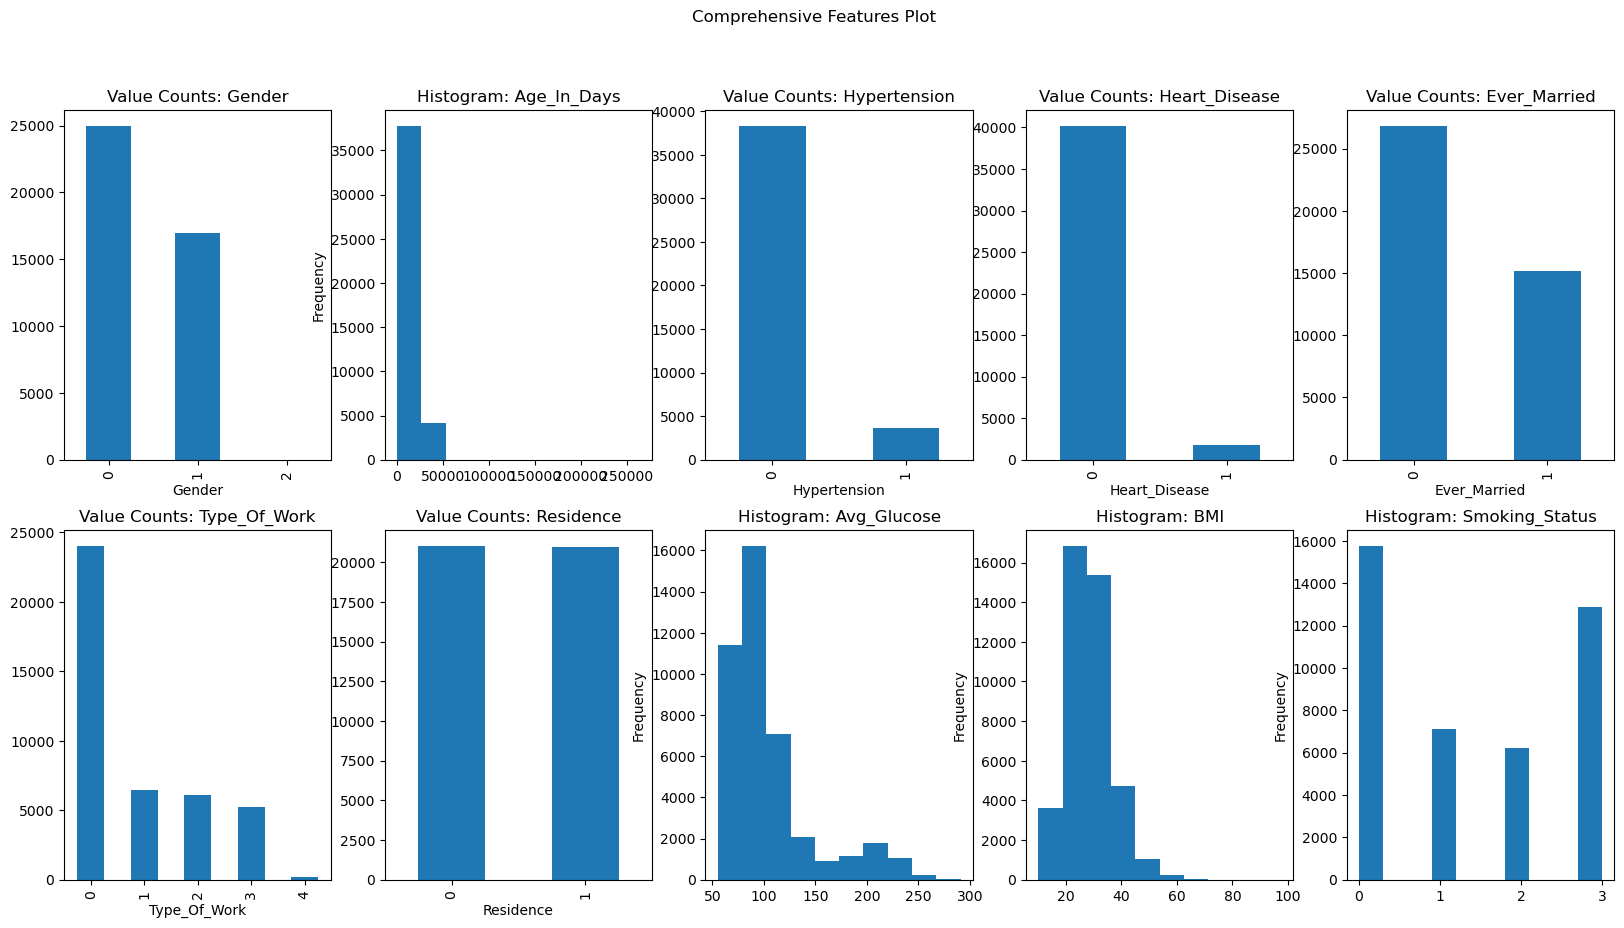

In [23]:
plot_features_value_counts(df_tmp)

### 3.5.1 Looking at the plots above, the histogram for the `Age_In_Days` seem to be pretty skewed. I will be investigating this feature for possible outlier removal

In [24]:
# more information about this column
df_tmp['Age_In_Days'].describe()

count     41938.000000
mean      15309.276131
std        8324.684852
min          30.200000
25%        8771.000000
50%       15733.000000
75%       21583.000000
max      264301.000000
Name: Age_In_Days, dtype: float64

In [25]:
print(f"Average Age of Samples in Years: {(np.mean(df_tmp['Age_In_Days']))/365} years", "\n",
     f"The Max Age is: {np.max(df_tmp['Age_In_Days'])/365} years", "\n",
     f"The Min Age is: {np.min(df_tmp['Age_In_Days'])/365} years")

Average Age of Samples in Years: 41.943222277896204 years 
 The Max Age is: 724.1123287671232 years 
 The Min Age is: 0.08273972602739726 years


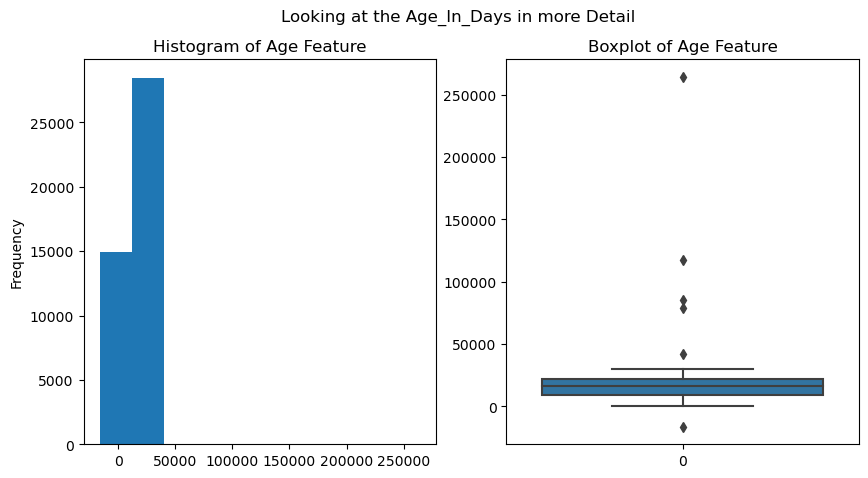

In [26]:
# looking at the histogram and boxplot a bit more closely
fig = plt.figure(figsize = (10,5))

# histogram subplot
ax = plt.subplot(1, 2, 1)
df['Age_In_Days'].plot.hist()
plt.title('Histogram of Age Feature')

# boxplot subplot
ax = plt.subplot(1, 2, 2)
sns.boxplot(df['Age_In_Days'])
plt.title('Boxplot of Age Feature')

fig.suptitle('Looking at the Age_In_Days in more Detail');

We will be using the Tukey's rule to remove outliers in the `Age_In_Days` column. Which is simply calculating the upper boundary as $$ Q3 + 1.5 IQR $$ and lower boundary as $$ Q1 - 1.5IQR$$ where the $ IQR = Q3 - Q1 $



In [27]:
# function for calculating the IQR:
def getting_IQR(series):
    '''
    Using the input pd.Series to output the IQR, and the upper_lim, lower_lim
    '''
    Q3 = series.quantile(0.75)
    Q1 = series.quantile(0.25)
    
    IQR = Q3 - Q1
    
    #lower boundary
    lower_lim = Q1 - (1.5 * IQR)
    
    # upper boundary
    upper_lim = Q3 + (1.5 * IQR)
    print(f'IQR = {IQR}, lower lim = {lower_lim}, upper_lim = {upper_lim}')
    
    return IQR, upper_lim, lower_lim    

In [28]:
IQR, upper_lim, lower_lim = getting_IQR(df['Age_In_Days'])

IQR = 13134.25, lower lim = -10912.375, upper_lim = 41624.625


In [29]:
df_tmp[df_tmp['Age_In_Days'] > upper_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
1342,0,85451.0,0,0,1,0,1,65.30,22.1,2.0,0
3786,1,42349.0,0,0,1,4,0,64.29,16.7,3.0,0
8155,1,264301.0,0,0,1,3,0,80.31,25.0,3.0,0
18177,0,117179.0,0,0,0,3,1,84.39,38.9,0.0,0
26716,0,79231.0,0,0,1,0,1,77.62,23.1,1.0,0


Because these Age values do not make sense, we will consider them as outliers and remove them

In [30]:
df_tmp[df_tmp['Age_In_Days'] < lower_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target


In [31]:
df_tmp.drop(labels = list(df_tmp[df_tmp['Age_In_Days'] > upper_lim].index), axis = 0, inplace = True)

In [32]:
df_tmp[df_tmp['Age_In_Days'] > upper_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target


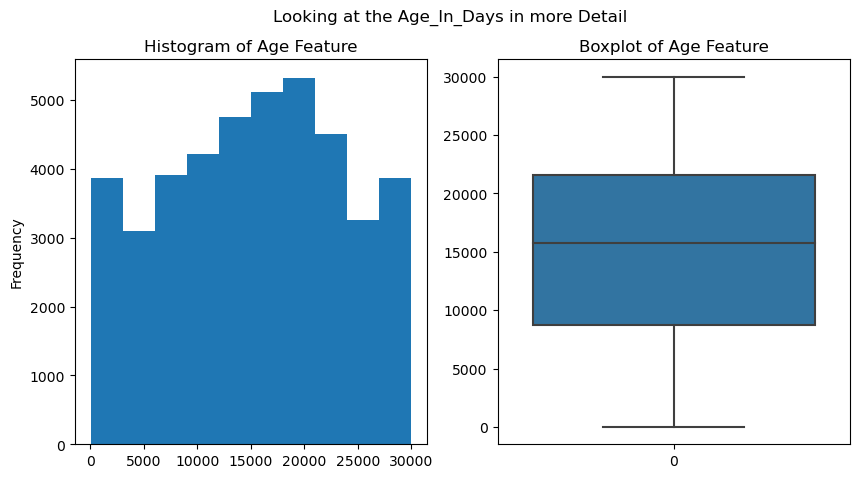

In [33]:
# looking at the histogram and boxplot a bit more closely
fig = plt.figure(figsize = (10,5))

# histogram subplot
ax = plt.subplot(1, 2, 1)
df_tmp['Age_In_Days'].plot.hist()
plt.title('Histogram of Age Feature')

# boxplot subplot
ax = plt.subplot(1, 2, 2)
sns.boxplot(df_tmp['Age_In_Days'])
plt.title('Boxplot of Age Feature')

fig.suptitle('Looking at the Age_In_Days in more Detail');

In [34]:
print(f'we have now a total of {len(df_tmp) / len(df) *100:.2f}% of data to work with!')

we have now a total of 96.62% of data to work with!


Now that we removed the outliers for the `Age_In_Days` column we can proceed with our analysis!

### 3.5.2 Class Distribution

Checking the `Target` column to see if our dataset is class-imbalanced

In [35]:
df_tmp['Target'].value_counts()

Target
0    41290
1      643
Name: count, dtype: int64

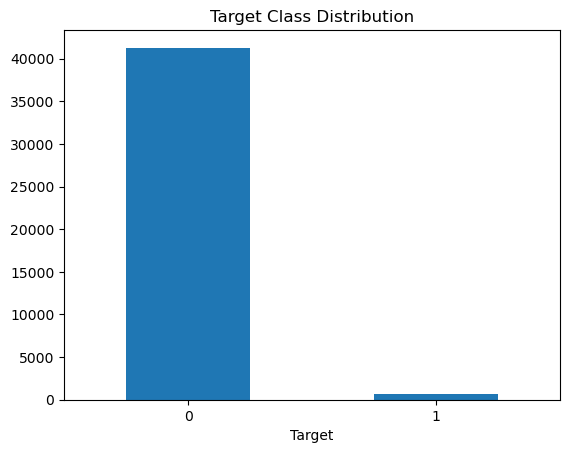

In [36]:
df_tmp['Target'].value_counts().plot(kind='bar')
plt.title('Target Class Distribution')
plt.xticks(rotation =0);

Seeing how the classes are heavily imbalanced, I will resample the `Target` column to randomly balance out the classes

In [37]:
# saving a copy of a dataframe that is not undersampled
df_many = df_tmp.copy()

In [38]:
from sklearn.utils import resample

df_majority = df_tmp.query('Target == 0')
df_minority = df_tmp.query('Target == 1')
# Downsample the majority class
df_maj_downsampled = resample(df_majority,
                             replace = True,
                             n_samples = 700,
                             random_state = 42)
df_tmp = pd.concat([df_maj_downsampled, df_minority])

df_tmp.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
16580,0,21564.0,1,0,0,0,1,73.45,35.8,0.0,0
899,1,29229.0,0,0,0,0,0,78.78,24.0,1.0,0
40084,0,12457.0,0,0,0,0,0,81.57,30.6,3.0,0
11850,0,1510.0,0,0,1,2,1,58.69,14.0,3.0,0
6601,0,20124.0,0,0,0,0,1,206.17,31.7,0.0,0


In [39]:
df_tmp['Target'].value_counts()

Target
0    700
1    643
Name: count, dtype: int64

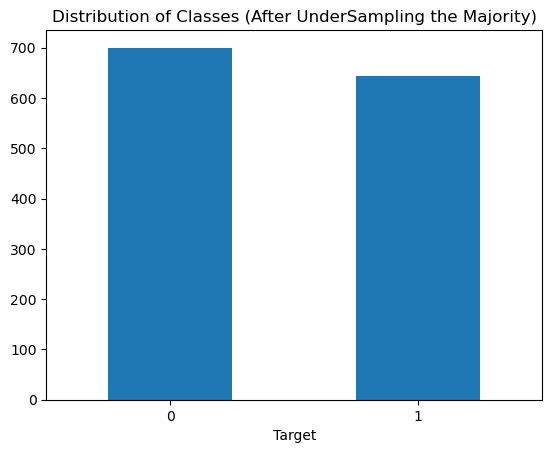

In [40]:
df_tmp['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes (After UnderSampling the Majority)')
plt.xticks(rotation=0);

### 3.5.3 Looking at the numerical features and their relationship / correlation

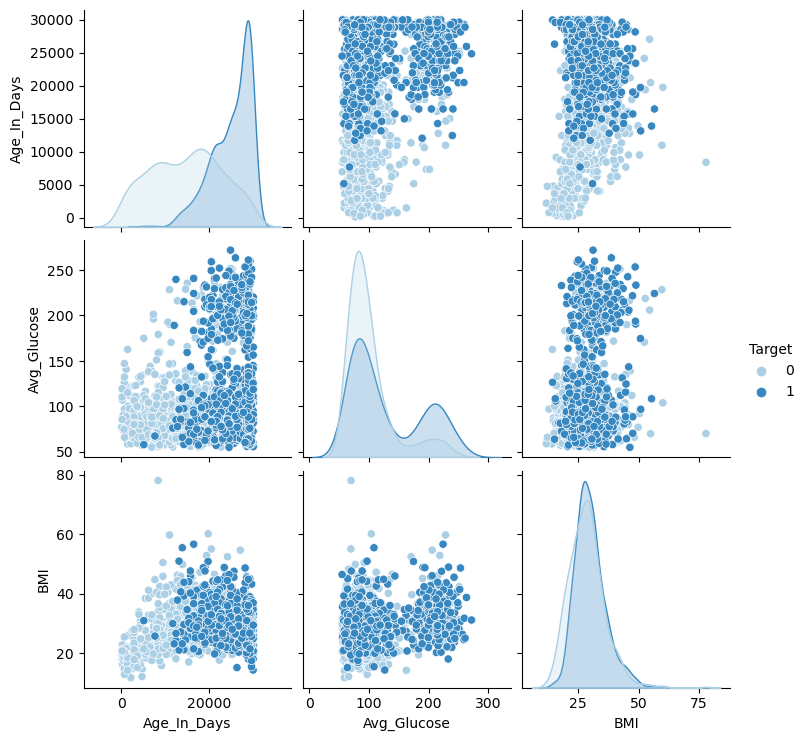

In [41]:
sns.pairplot(df_tmp, vars = float_features, hue = 'Target', palette = 'Blues');

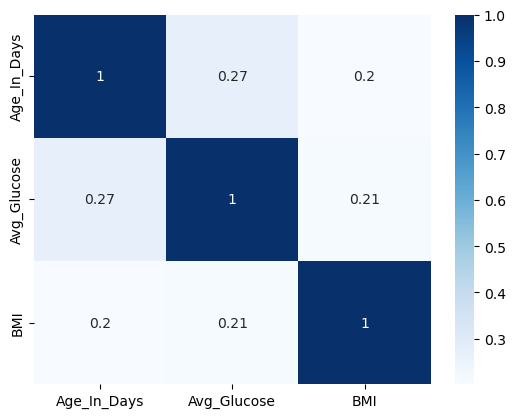

In [42]:
# getting the correlation matrix for just the numerical values
corr_mat_num = df_tmp[float_features].corr()
sns.heatmap(corr_mat_num, annot = True, cmap = 'Blues');

In [43]:
# creating a function for looking at feature variabilitiy
def feature_variability(data, column_x, column_y):
    '''
    Outputs the results of the OLS regression summary and visualizes this as a scatterplot
    '''
    # fitting the OLS variables
    corr_y = data[column_y]
    corr_x = data[column_x]

    x_stat = sm.add_constant(corr_x)
    results = sm.OLS(corr_y, x_stat).fit()
    
    
    # visualization:
    y_hat = results.params[0] + results.params[1]*corr_x
    # plotting Age_In_days vs Avg_Glucose
    fig, ax = plt.subplots(figsize=(5,5))
    ax = plt.scatter(corr_x, corr_y)
    fig = plt.plot(corr_x, y_hat, lw = 4, c = 'orange', label = 'regression line')
    plt.title(f'{column_y} vs {column_x}')
    plt.ylabel(column_y)
    plt.xlabel(column_x)
    plt.xticks(rotation=0)
    plt.show();
    
    return results.summary()

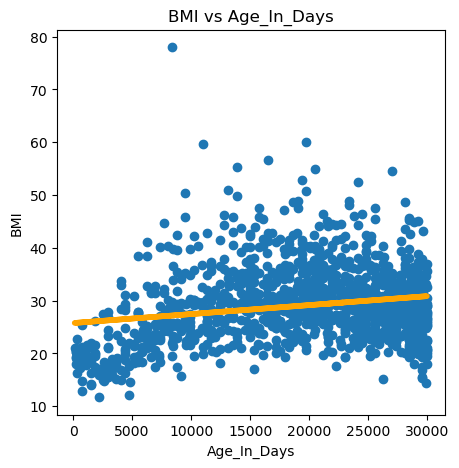

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     57.11
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           7.59e-14
Time:                        21:04:22   Log-Likelihood:                -4488.1
No. Observations:                1343   AIC:                             8980.
Df Residuals:                    1341   BIC:                             8991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.7520      0.480     53.683      0.000      24.811      26.693
Age_In_Days     0.0002   2.25e-05      7.557      0.000       0.000       0.000
==============================================================================
Omnibus:                      305.536   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              929.262
Skew:                           1.133   Prob(JB):                    1.63e-202
Kurtosis:                       6.387   Cond. No.                     5.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
feature_variability(data =df_tmp, column_x = 'Age_In_Days',
                   column_y = 'BMI')

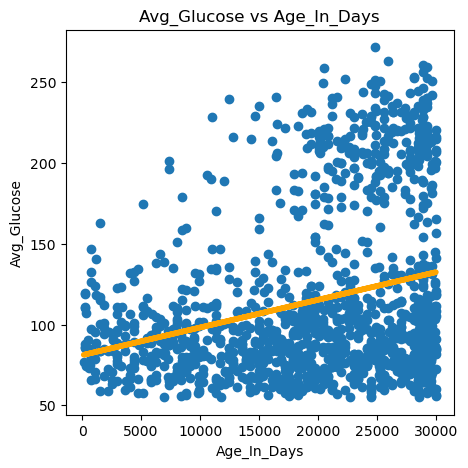

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Avg_Glucose   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.01e-23
Time:                        21:04:22   Log-Likelihood:                -7185.2
No. Observations:                1343   AIC:                         1.437e+04
Df Residuals:                    1341   BIC:                         1.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          81.0677      3.574     22.684      0.000      74.057      88.078
Age_In_Days     0.0017      0.000     10.235      0.000       0.001       0.002
==============================================================================
Omnibus:                      150.486   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.052
Skew:                           0.949   Prob(JB):                     8.09e-45
Kurtosis:                       2.834   Cond. No.                     5.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
feature_variability(df_tmp, column_x = 'Age_In_Days',
                   column_y = 'Avg_Glucose')

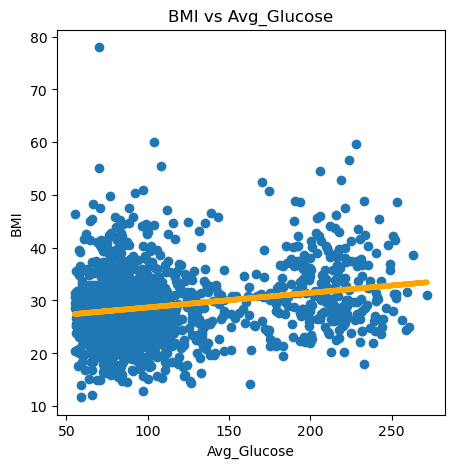

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     61.66
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           8.31e-15
Time:                        21:04:22   Log-Likelihood:                -4486.0
No. Observations:                1343   AIC:                             8976.
Df Residuals:                    1341   BIC:                             8986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.9151      0.445     58.185      0.000      25.041      26.789
Avg_Glucose     0.0277      0.004      7.852      0.000       0.021       0.035
==============================================================================
Omnibus:                      241.823   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              678.523
Skew:                           0.928   Prob(JB):                    4.58e-148
Kurtosis:                       5.947   Cond. No.                         302.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
feature_variability(df_tmp, column_x = 'Avg_Glucose',
                   column_y = 'BMI')

Quick Summary:
1. Created a Pairplot to look at the KDE and scatterplot distribution of the numerical features relationships while also coloring the points by stroke-positivity to see any initial clustering possibilities
	* Trends I noticed. Stroke patients seem to be older, with a bit more average glucose, however with no difference in BMI. 
2. I then created another correlation matrix with just the numerical features and see that the the coefficient is on the lower range. 
3. Then, I created a function called `feature_variability` that inputs the 2 columns of interest and the dataframe and outputs a scatterplot and a OLS regression statistical output. 
	* seeing how all these relationship had a $Durbin-Watson$ score close to 2, we can safely assume there is no autocorrelation between the features.

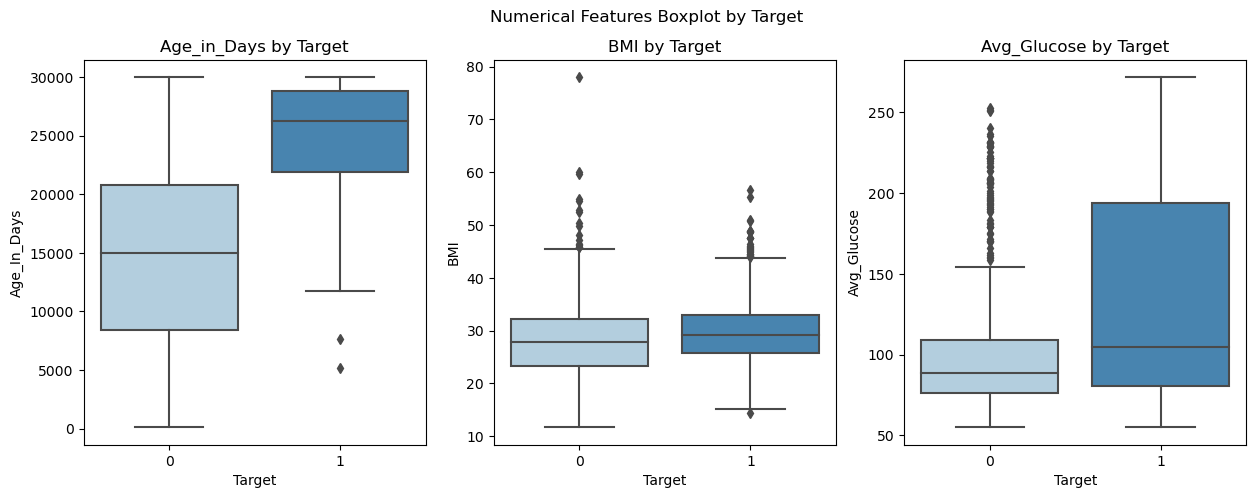

In [47]:
fig ,ax = plt.subplots(ncols = 3, nrows=1, figsize = (15,5))
sns.boxplot(ax = ax[0], data = df_tmp, x = 'Target', y = 'Age_In_Days', palette = 'Blues')
sns.boxplot(ax = ax[1], data = df_tmp, x = 'Target', y = 'BMI', palette = 'Blues')
sns.boxplot(ax = ax[2], data = df_tmp, x = 'Target', y = 'Avg_Glucose', palette = 'Blues')

ax[0].set(title = 'Age_in_Days by Target')
ax[1].set(title = 'BMI by Target')
ax[2].set(title = 'Avg_Glucose by Target')
fig.suptitle('Numerical Features Boxplot by Target');


Seeing the mean differences in Age between the Target groups, I will run a test for it's significance.

#### Hypothesis Testing of Age_In_Days feature

In [48]:
df_tmp.query('Target == 1')[float_features].describe()

,Age_In_Days,Avg_Glucose,BMI
count,643.000000,643.000000,643.000000
mean,25011.934681,129.767823,29.868118
std,4439.560639,60.306648,6.344873
min,5158.000000,55.010000,14.300000
25%,21920.500000,80.695000,25.700000
50%,26286.000000,104.510000,29.100000
75%,28846.500000,193.720000,33.000000
max,29980.000000,271.740000,56.600000


In [49]:
df_tmp.query('Target == 0')[float_features].describe()

,Age_In_Days,Avg_Glucose,BMI
count,700.000000,700.000000,700.000000
mean,14734.599429,100.967029,28.377143
std,7996.935595,40.525750,7.463689
min,126.800000,55.200000,11.700000
25%,8395.750000,76.132500,23.300000
50%,15010.500000,88.820000,27.900000
75%,20819.250000,109.047500,32.200000
max,29972.000000,252.720000,78.000000


In [50]:
np.random.seed(42)
import random

# querrt
sick = df_tmp.query('Target == 1')
notsick = df_tmp.query('Target == 0')

## empty list for storing mean ages in each samples
mean_sick_age = []
mean_notsick_age = []

for _ in range(50):
    mean_sick_age.append(np.mean(random.sample(list(sick['Age_In_Days']),50)))
    mean_notsick_age.append(np.mean(random.sample(list(notsick['Age_In_Days']),50)))
    

# Print them out
print (f"Sick mean sample mean: {round(np.mean(mean_sick_age),2)}")
print (f"Not Sick mean sample mean: {round(np.mean(mean_notsick_age),2)}")
print (f"Difference between sick and not sick mean sample mean: {round(np.mean(mean_sick_age) - np.mean(mean_notsick_age),2)}")


Sick mean sample mean: 24992.19
Not Sick mean sample mean: 14930.03
Difference between sick and not sick mean sample mean: 10062.16


In [51]:
from statsmodels.stats.weightstats import ztest
t_dict = {}
p_dict = {}

a = mean_sick_age
b = mean_notsick_age
    
# running the t_test with unequal variance 
stat, p_value = scipy.stats.mannwhitneyu(a, b)

t_dict['Age_In_Days'] = stat
p_dict['Age_In_Days'] = p_value
pd.DataFrame(t_dict.values(), t_dict.keys(), columns = ['test statistic'])

,test statistic
Age_In_Days,2500.0


In [52]:
pd.DataFrame(p_dict.values(), p_dict.keys(), columns = ['p_value'])

,p_value
Age_In_Days,7.066072e-18


4. Hypothesis testing of Age_In_Days feature 
	* through randomly sampling 50 patients per group to see significant differences in age. 
	* **Conclusion** Hypothesis testing: After randomly sampling 50 from each group. The results from this test rules out our null hypothesis and shows a significant difference in the age in the stroke sample group.

### 3.5.4 Categorical Visualizations in relation with the Target feature

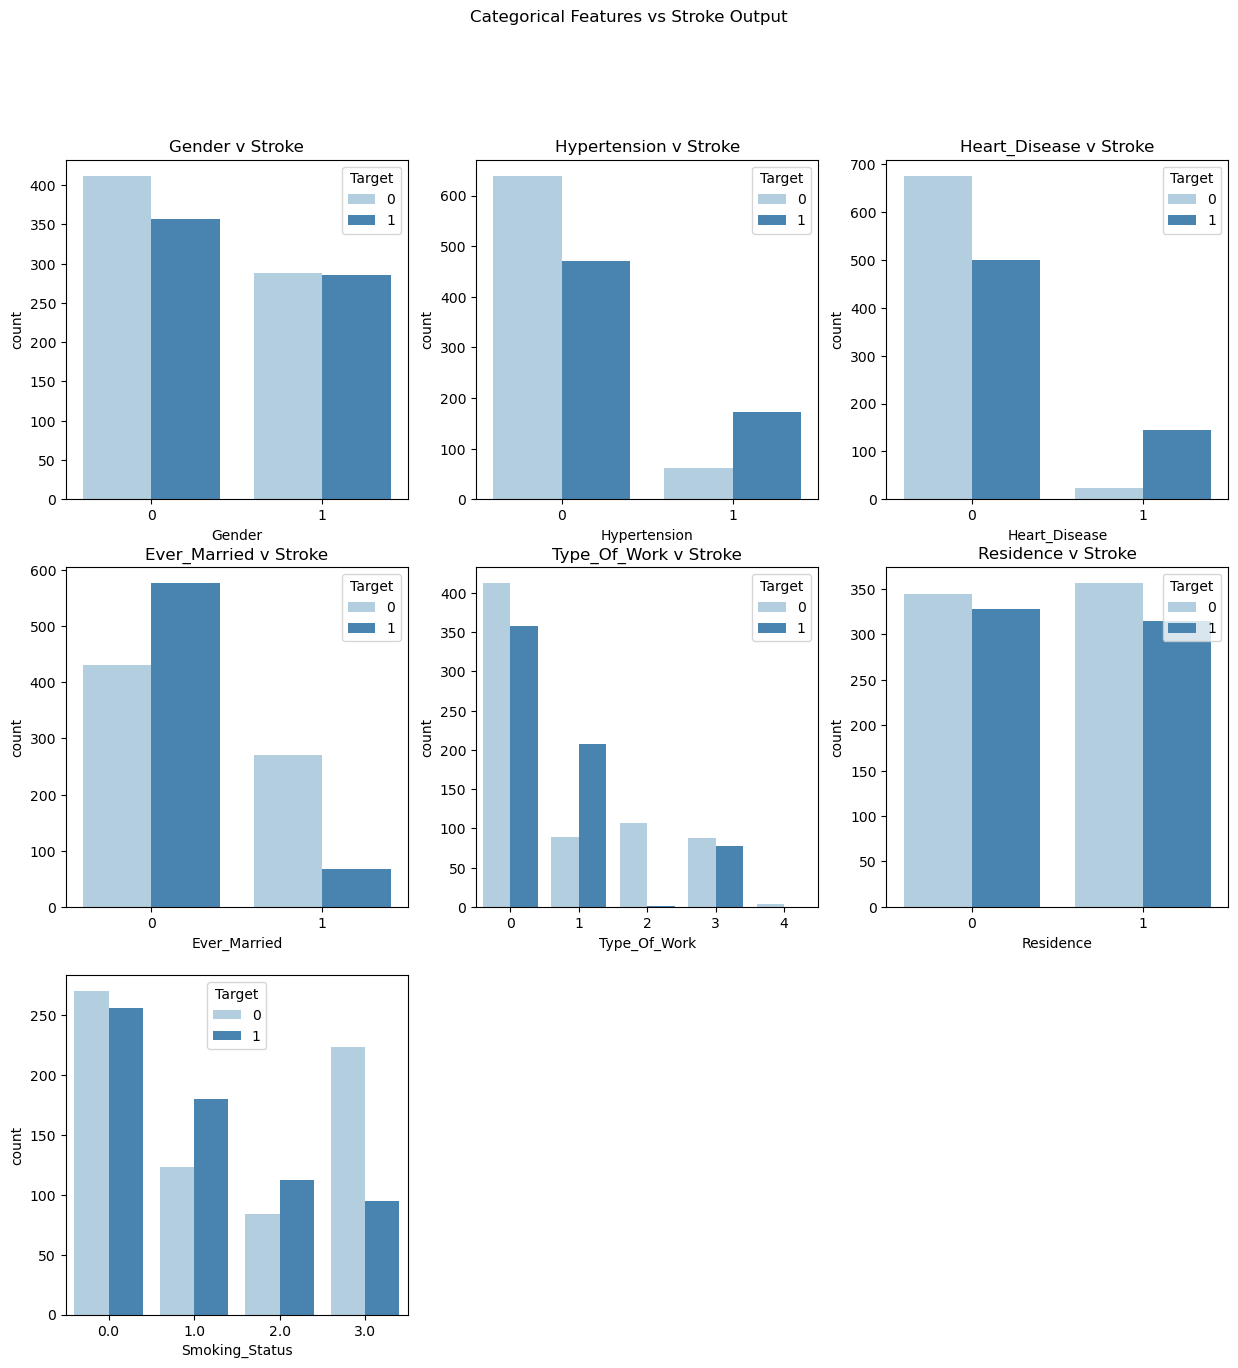

In [138]:
# plot of the categorical variables and the target feature
fig, ax = plt.subplots(ncols = 3,
                      nrows = 3,
                      figsize = (15,15))
fig.suptitle('Categorical Features vs Stroke Output')
sns.countplot(ax = ax[0,0], data = df_tmp, x = 'Gender',hue='Target', palette = 'Blues')
sns.countplot(ax = ax[0,1], data = df_tmp, x = 'Hypertension', hue='Target', palette = 'Blues')
sns.countplot(ax = ax[0,2], data = df_tmp, x = 'Heart_Disease',hue='Target', palette = 'Blues')
sns.countplot(ax = ax[1,0], data = df_tmp, x = 'Ever_Married', hue='Target', palette = 'Blues')
sns.countplot(ax = ax[1,1], data = df_tmp, x = 'Type_Of_Work', hue='Target', palette = 'Blues')
sns.countplot(ax = ax[1,2], data = df_tmp, x = 'Residence', hue='Target', palette = 'Blues')
sns.countplot(ax = ax[2,0], data = df_tmp, x = 'Smoking_Status', hue='Target', palette = 'Blues');
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

# creating title for each figure
ax[0,0].set(title = 'Gender v Stroke')
ax[0,1].set(title = 'Hypertension v Stroke')
ax[0,2].set(title = 'Heart_Disease v Stroke')
ax[1,0].set(title = 'Ever_Married v Stroke')
ax[1,1].set(title = 'Type_Of_Work v Stroke')
ax[1,2].set(title = 'Residence v Stroke')
ax[2,1].set(title = 'Smoking_Status v Stroke');

### 3.5.5 Potential Effects of 'Type_Of_Work' on Stroke
As mentioned in the Overview of Stroke slide in the presentation, work-life stress may be associated with higher levels of stroke incidence. So here I investigate the potential relationships that Type_Of_Work might have on Heart_Disease, BMI, and Hypertension features, all of which were associated with higher risk of stroke. Jobs 2 and 4 seems to be less associated with hypertension and heart disease (both of which have a higher mean of incidence in patients with stroke)


>Here instead of using the `df_tmp` dataset that has been randomly resampled, I will use the df_many to capture a more comprehensive understanding.

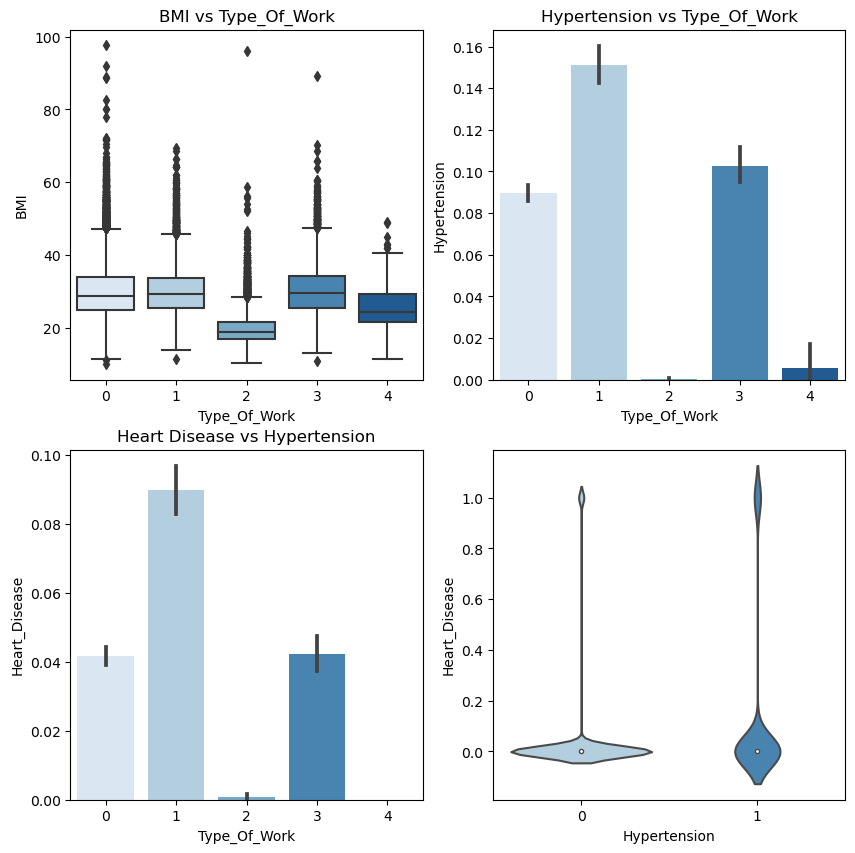

In [159]:
fig, ax = plt.subplots(2, 2, figsize = (10,10))
sns.boxplot(ax = ax[0,0], data = df_many, x = 'Type_Of_Work', y = 'BMI', palette = 'Blues')
ax[0,0].set(title='BMI vs Type_Of_Work')
sns.barplot(ax = ax[0,1], data = df_many, x = 'Type_Of_Work', y = 'Hypertension', palette = 'Blues')
ax[0,1].set(title='Hypertension vs Type_Of_Work')
sns.barplot(ax = ax[1,0], data = df_many, x = 'Type_Of_Work', y = 'Heart_Disease', palette = 'Blues')
ax[1,0].set(title='Heart Disease vs Type_Of_Work')
sns.violinplot(ax = ax[1,1], data = df_many, x = 'Hypertension', y = 'Heart_Disease', palette = 'Blues');
ax[1,0].set(title='Heart Disease vs Hypertension');


In [160]:
df_tow = df_many.groupby('Type_Of_Work').mean()
for column in df_tow.items():
    print(column)  

('Gender', Type_Of_Work
0    0.381786
1    0.402224
2    0.516997
3    0.387257
4    0.428571
Name: Gender, dtype: float64)
('Age_In_Days', Type_Of_Work
0    16343.344133
1    21584.019771
2     2478.068383
3    17858.458794
4     6512.874286
Name: Age_In_Days, dtype: float64)
('Hypertension', Type_Of_Work
0    0.089567
1    0.151375
2    0.000330
3    0.102823
4    0.005714
Name: Hypertension, dtype: float64)
('Heart_Disease', Type_Of_Work
0    0.041698
1    0.089898
2    0.000660
3    0.042350
4    0.000000
Name: Heart_Disease, dtype: float64)
('Ever_Married', Type_Of_Work
0    0.294179
1    0.136855
2    1.000000
3    0.187142
4    0.960000
Name: Ever_Married, dtype: float64)
('Residence', Type_Of_Work
0    0.495538
1    0.509268
2    0.501155
3    0.501717
4    0.474286
Name: Residence, dtype: float64)
('Avg_Glucose', Type_Of_Work
0    103.903810
1    111.486053
2     92.339256
3    106.068987
4     94.871714
Name: Avg_Glucose, dtype: float64)
('BMI', Type_Of_Work
0    29.979326
1 

In [161]:
df_tow.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Residence,Avg_Glucose,BMI,Smoking_Status,Target
Type_Of_Work,,,,,,,,,,
0,0.381786,16343.344133,0.089567,0.041698,0.294179,0.495538,103.903810,29.979326,1.170086,0.014928
1,0.402224,21584.019771,0.151375,0.089898,0.136855,0.509268,111.486053,30.126074,1.141489,0.031974
2,0.516997,2478.068383,0.000330,0.000660,1.000000,0.501155,92.339256,19.924076,2.713531,0.000165
3,0.387257,17858.458794,0.102823,0.042350,0.187142,0.501717,106.068987,30.562896,1.144601,0.014689
4,0.428571,6512.874286,0.005714,0.000000,0.960000,0.474286,94.871714,26.064571,1.400000,0.000000


Recall the encoding: 
* Private: 0
* Self-employed: 1
* children: 2
* Govt_job: 3
* Never_worked: 4
   


## 4. Modeling: Finding the Best Estimator

For this case study we will be looking at these models:
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier
4. SVC
5. XGBoostClassifier
6. DecisionTree
7. Naive Bayes

### 4.1 Getting our Data Ready for Modeling
`preparing_data()` function below is basically a compilation of all the steps that were involved in preprocessing up until now. This will be for future scenarios where it might be a good idea to re-evaluate the model with new data or model suggestions.

In [56]:
# creating a function that will organize our data and remove outliers 
# so that it will be ready for modeling
def preparing_data(data):
    '''
    This function will do a couple things: 
    1) Remove the 'BMI' column's missing values
    2) Drop the ID column
    3) Replacing the 'Stroke' colum name with 'Target'
    4) Remove the outlier rows in the 'Avg_Glucose'
    5) Create a new category in 'Smoking_Status' to include a 'Missing' value
    '''
    # creating a copy of the data
    data_tmp = data.copy()
    
    # 1. removing the 'BMI' missing values
    print(f"removing BMI missing values, total of {data_tmp['BMI'].isna().sum()}...")
    data_tmp.dropna(subset=['BMI'], inplace = True)
    
    ## 2. I will be dropping the ID column because it is irrelevant:
    print('Dropping the ID column...')
    data_tmp.drop('ID', axis = 1, inplace = True)
    
#     print('Dropping the EverMarried...')
#     data_tmp.drop('Ever_Married', axis = 1, inplace = True)
        
    ## 3. I will also be replacing the 'Stroke' column name with 'Target'
    print('Renaming the target column...')
    data_tmp.rename({'Stroke': 'Target'}, axis = 1, inplace = True)
          
    ## 4. Removing the outliers from the Age_In_Days column
    print('detecting outliers...')
    IQR, upper_lim, lower_lim = getting_IQR(data_tmp['Age_In_Days'])
    
    outlier_index = list(data_tmp[data_tmp['Age_In_Days'] > upper_lim].index)
    data_tmp.drop(labels =  outlier_index, inplace = True, axis = 0) 
    
    # 5. Encoding the Smoking_Status Column
    print('filling in the smoking status missing values...')
    data_tmp['Smoking_Status'] = data_tmp['Smoking_Status'].fillna('Missing')
    
    # Balancing the classes:
    df_majority = data_tmp.query('Target == 0')
    df_minority = data_tmp.query('Target == 1')
    # Downsample the majority class
    df_maj_downsampled = resample(df_majority,
                                 replace = True,
                                 n_samples = 700,
                                 random_state = 42)
    data_tmp = pd.concat([df_maj_downsampled, df_minority])
          
    return data_tmp   

In [57]:
df_model = preparing_data(df)

removing BMI missing values, total of 1462...
Dropping the ID column...
Renaming the target column...
detecting outliers...
IQR = 12812.0, lower lim = -10447.0, upper_lim = 40801.0
filling in the smoking status missing values...


In [58]:
df_model.head(10)

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
16580,Female,21564.0,1,0,Yes,Private,Rural,73.45,35.8,never smoked,0
899,Male,29229.0,0,0,Yes,Private,Urban,78.78,24.0,formerly smoked,0
40084,Female,12457.0,0,0,Yes,Private,Urban,81.57,30.6,Missing,0
11850,Female,1510.0,0,0,No,children,Rural,58.69,14.0,Missing,0
6601,Female,20124.0,0,0,Yes,Private,Rural,206.17,31.7,never smoked,0
17682,Female,10232.0,0,0,No,Private,Urban,64.30,30.2,never smoked,0
39069,Female,18271.0,0,0,Yes,Private,Urban,76.15,22.2,never smoked,0
23066,Female,241.6,0,0,No,children,Urban,118.71,18.0,Missing,0
16823,Female,9509.0,0,0,No,Private,Urban,84.20,35.2,never smoked,0
43185,Female,18988.0,0,0,Yes,Self-employed,Rural,102.67,23.0,never smoked,0


In [59]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 16580 to 43318
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1343 non-null   object 
 1   Age_In_Days     1343 non-null   float64
 2   Hypertension    1343 non-null   int64  
 3   Heart_Disease   1343 non-null   int64  
 4   Ever_Married    1343 non-null   object 
 5   Type_Of_Work    1343 non-null   object 
 6   Residence       1343 non-null   object 
 7   Avg_Glucose     1343 non-null   float64
 8   BMI             1343 non-null   float64
 9   Smoking_Status  1343 non-null   object 
 10  Target          1343 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 125.9+ KB


In [60]:
df_model.isna().sum()

Gender            0
Age_In_Days       0
Hypertension      0
Heart_Disease     0
Ever_Married      0
Type_Of_Work      0
Residence         0
Avg_Glucose       0
BMI               0
Smoking_Status    0
Target            0
dtype: int64

In [61]:
df_model.Target.value_counts()

Target
0    700
1    643
Name: count, dtype: int64

Looks like the `preparing_data` function worked! The missing value are taken care of and the column names are changed accordingly

### 4.2 Splitting our dataset into Training and Testing 
The df_model is a copy of our original raw datafile that was imported. It will be used for splitting the dataset into training and testing. Because the GridSearchCV is used for hyperparameters tuning, creating a validation training and testing sets will be redundant, and hence will be skipped for now. 

In [62]:
# creating a new X and y dataset 
X = df_model.drop('Target', axis = 1)
y = df_model['Target']

# splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# looking at the shapes of the newly created training and testing datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1074, 10), (269, 10), (1074,), (269,))

In [63]:
X_train.head(10)

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status
4962,Male,21575.0,0,0,Yes,Private,Rural,96.16,44.1,Missing
13446,Female,20815.0,0,1,Yes,Private,Urban,216.58,31.0,Missing
40203,Female,28878.0,0,1,Yes,Private,Urban,172.13,24.6,never smoked
37358,Male,21219.0,0,1,Yes,Private,Rural,63.26,29.6,never smoked
19828,Male,28870.0,1,0,Yes,Private,Urban,256.52,26.3,Missing
24477,Male,16807.0,0,0,No,Private,Urban,86.73,30.3,formerly smoked
21082,Male,11687.0,0,0,Yes,Private,Rural,99.05,24.5,never smoked
25676,Male,25557.0,0,0,Yes,Private,Urban,90.23,36.4,never smoked
14851,Female,28509.0,0,0,Yes,Private,Rural,78.81,19.6,Missing
19129,Female,8031.0,0,0,No,Private,Rural,73.63,24.3,Missing


In [64]:
y

16580    0
899      0
40084    0
11850    0
6601     0
        ..
43130    1
43148    1
43268    1
43304    1
43318    1
Name: Target, Length: 1343, dtype: int64

looks like our data splitting worked! 

### 4.3 Creating our Pipeline

Here I will be creating a modeling Pipeline with a ColumnTransformer to impute and encode the dataframe. 

Recall we have separate lists of columns:
1. `int_features` (already encoded)
2. `float_features` (no need for encoding)
3. `cat_features` (need encoding)

First we need to remove the `ID` and `Stroke` columns from the `int_features`

The two commented-out lines of code for the other categorical features (`Residence`, `Type_Of_Work`, and `Ever_Married`) can be used later on when fine tuning and feature engineering for future models.

In [65]:
int_features.remove('ID')

In [66]:
int_features.remove('Stroke')

In [67]:
# cat_features.remove('Residence')

In [68]:
# cat_features.remove('Type_Of_Work')

In [69]:
# cat_features.remove('Ever_Married')

### 4.4 Creating a class to evaluate the models

For this Class `ModelEvaluator`, the proposed attribute functions / methods are:
1. preprocessor(int_features, cat_features, float_features) --Preprocess Step
2. model_piper(model) -- Modeling Step
3. model_fit() -- Modeling Step
4. model_scorer() -- Modeling Step
5. model_report() -- Modeling Step
6. plot_roc_curve() -- Metrics Evaluation Step
7. crossval_score(self, X, y, cv=5) -- Metrics Evaluation Step
8. plot_confusion_matrix() -- Metrics Evaluation Step
9. get_params() -- Parameter Evaluation Step

This Class will be used for testing the models in a quick and succint way

In [70]:
import time

class ModelEvaluator():
    def __init__(self, model_name, X_train, X_test, y_train, y_test):
        '''
        model input should be in the format of a dictionary
        '''
        self._model_name = model_name
        self._X_train = X_train
        self._X_test = X_test
        self._y_train = y_train
        self._y_test = y_test

    def preprocessor(self, int_features, cat_features, float_features):
        '''
        preprocessing the input data for model
        '''
        self._int_features = int_features
        self._cat_features = cat_features
        self._float_features = float_features
        
        # creating the preprocessor pipeline 
        cat_pipe = Pipeline(steps=[
            ('OrdEncode', OrdinalEncoder()),
            ('scaler', StandardScaler())
        ])
        
        int_pipe = Pipeline(steps =[
            ('scaler', StandardScaler())
        ])
        
        num_pipe = Pipeline(steps = [
            ('scaler', StandardScaler())
        ])
        self._column_transformer = ColumnTransformer(transformers=[
            ('cat', cat_pipe, self._cat_features),
            ('num', num_pipe, self._float_features),
            ('int', int_pipe, self._int_features)
        ])
        
    def model_piper(self, model):
        '''
        instantiating the model and fitting with X_train and y_train data
        '''
        np.random.seed(42) 
        
        self._model = model

             
        # creating the model pipeline
        self._model_pipeline = Pipeline(steps=[
            ('col_transfomer', self._column_transformer),
            ('model', self._model )
        ])
     
    def model_fit(self):
        '''
        fitting the model with the pipeline function
        '''
        start_time = time.time()
        print(f'testing {self._model_name}...')
        # instantiating the model
        model_fit = self._model_pipeline.fit(self._X_train, self._y_train)
        end_time = time.time()
        
        print(f'it took {end_time - start_time}s to fit this model')
        
        return model_fit
    
    def model_scorer(self):
        '''
        evaluating the model
        '''
        np.random.seed(42)
        
        #scoring the model
        score_dict = {'accuracy score': self._model_pipeline.score(self._X_test, self._y_test),
                      'precision score': precision_score(self._y_test, self._model_pipeline.predict(self._X_test)),
                     'recall score': recall_score(self._y_test, self._model_pipeline.predict(self._X_test)),
                     'f1 score': f1_score(self._y_test, self._model_pipeline.predict(self._X_test))
                     }
        return score_dict
    
    def model_report(self):
        '''
        output of the classification report
        '''
        return classification_report(self._y_test, self._model_pipeline.predict(self._X_test))
    
    
    def plot_roc_curve(self):
        '''
        plotting the roc curve
        '''
        # getting the positive probabilities 
        preds_proba = self._model_pipeline.predict_proba(self._X_test)[: ,1]
        
        # getting the fpr, tpr, and thresholds
        fpr, tpr, thresholds = roc_curve(self._y_test, preds_proba)
        
        # plotting the ROC Curve
        fig, ax = plt.subplots(figsize = (3,3))
        ax.plot(fpr, tpr, label = 'ROC')
        ax.plot([0,1], label = 'True')
        ax.set(title = 'Plot of the ROC Curve',
              ylabel = 'TPR',
              xlabel = 'FPR')
        ax.legend();
    def get_auc_score(self):
        '''
        returns the ROC AUC score
        '''
        result = roc_auc_score(self._y_test, self._model_pipeline.predict_proba(self._X_test)[:,1])
        return result
        
        
    def crossval_score(self, X, y, cv=5):
        '''
        getting the crossvalidation score into a dictionary as well as a np.mean() value
        '''
        self._X = X
        self._y = y
        self._cv = cv
        return cross_val_score(self._model_pipeline, self._X, self._y, cv= self._cv, verbose=True)

        
    def plot_confusion_matrix(self):
        '''
        plotting the confusion matrix
        '''
        cm = confusion_matrix(self._y_test, self._model_pipeline.predict(self._X_test))
        ConfusionMatrixDisplay(cm).plot(cmap='Blues');
        
    def get_params(self):
        '''
        output of the best_params into a dataframe
        '''
        df = pd.DataFrame(self._model_pipeline.named_steps['model'].get_params().values(), 
                          self._model_pipeline.named_steps['model'].get_params().keys(),
                         columns = ['Model Params'])
        return df


Functionizing some of the methods in the `ModelEvaluator` class to make it compatible with hyperparameter-tuned gridsearch models

In [71]:
def model_scorer(model, X_test, y_test):
    '''
    evaluating the model
    '''
    np.random.seed(42)
        
    #scoring the model
    score_dict = {'accuracy score': model.score(X_test, y_test),
                      'precision score': precision_score(y_test, model.predict(X_test)),
                     'recall score': recall_score(y_test, model.predict(X_test)),
                     'f1 score': f1_score(y_test, model.predict(X_test))
                     }
        
    return score_dict
    
def model_report(model, X_test, y_test):
    '''
    output of the classification report
    '''
    
    return classification_report(y_test, model.predict(X_test))
    
    
def plot_roc_curve(model, X_test, y_test):
    '''
    plotting the roc curve
    '''
    # getting the positive probabilities 
    preds_proba = model.predict_proba(X_test)[: ,1]
        
    # getting the fpr, tpr, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, preds_proba)
        
    # plotting the ROC Curve
    fig, ax = plt.subplots(figsize = (3,3))
    ax.plot(fpr, tpr, label = 'ROC')
    ax.plot([0,1], label = 'True')
    ax.set(title = 'Plot of the ROC Curve',
          ylabel = 'TPR',
             xlabel = 'FPR')
    ax.legend();
        
def plot_confusion_matrix(model, X_test, y_test):
    '''
    plotting the confusion matrix
    '''
    cm = confusion_matrix(y_test, model.predict(X_test))
    ConfusionMatrixDisplay(cm).plot(cmap='Blues');


### 4.5 Testing and Evaluating our Proposed Models

In [72]:
np.random.seed(42)
# testing a dictionary of models:
models_dict = {'LogisticRegression': LogisticRegression(),
              'KNN' : KNeighborsClassifier(),
                'SVC' : SVC(),
              'RandomForest' : RandomForestClassifier(),
              'XGBoost': XGBClassifier(),
               'DecisionTree': DecisionTreeClassifier(),
               'GaussianNB' : GaussianNB()
              }

score_dict = {}
report_dict = {}
cross_score_dict = {}

for model_name, model in models_dict.items():
    # instantiating the ModelEvaluator Class
    test = ModelEvaluator(model_name, X_train, X_test, y_train, y_test)
    
    # preprocessing the data
    test.preprocessor(int_features, cat_features, float_features)
    
    # piping the model
    test.model_piper(model)
    
    # fitting the model 
    test.model_fit()
    
    # getting the score outputs
    score_dict[model_name] = test.model_scorer()
    
    # report dict
    report_dict[model_name] = test.model_report()
    
    # cross_val_score
    cross_score_dict[model_name] = test.crossval_score(X,y, cv=5)

testing LogisticRegression...
it took 0.01752185821533203s to fit this model
testing KNN...
it took 0.010429143905639648s to fit this model


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


testing SVC...
it took 0.03447294235229492s to fit this model


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


testing RandomForest...
it took 0.15804791450500488s to fit this model


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


testing XGBoost...
it took 0.10838031768798828s to fit this model
testing DecisionTree...
it took 0.011150836944580078s to fit this model
testing GaussianNB...
it took 0.00647425651550293s to fit this model


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [73]:
for model, report in report_dict.items():
    print(f'{model}')
    print(report)
    print('')

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       143
           1       0.76      0.89      0.82       126

    accuracy                           0.81       269
   macro avg       0.82      0.82      0.81       269
weighted avg       0.82      0.81      0.81       269


KNN
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       143
           1       0.75      0.82      0.78       126

    accuracy                           0.79       269
   macro avg       0.79      0.79      0.79       269
weighted avg       0.79      0.79      0.79       269


SVC
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       143
           1       0.75      0.90      0.82       126

    accuracy                           0.82       269
   macro avg       0.83      0.82      0.82       269
weighted avg       0.83      0.82      0.82  

In [74]:
# creating a list of colum names that changes according to cv= parameter input
column_names = ['K_' + str(i) for i in range(1,len(list(cross_score_dict.values())[0])+1)]
# creating an avg_score for the cross validations
avg_score = [np.mean(i) for i in cross_score_dict.values()]
# creating a standard deviation column
std_score = [np.std(i) for i in cross_score_dict.values()]
# creating a dataframe for each cross validation
cross_score_dict_pd = pd.DataFrame(cross_score_dict).T
# changing the column names to make it more appropriate
cross_score_dict_pd.columns= column_names
# appending avg and std scores column
cross_score_dict_pd['Averaged_CV_Score'] = avg_score
cross_score_dict_pd['CV_Score_STD'] = std_score

cross_score_dict_pd

,K_1,K_2,K_3,K_4,K_5,Averaged_CV_Score,CV_Score_STD
LogisticRegression,0.799257,0.773234,0.788104,0.779851,0.817164,0.791522,0.015490
KNN,0.784387,0.728625,0.750929,0.753731,0.753731,0.754281,0.017756
SVC,0.806691,0.765799,0.799257,0.768657,0.813433,0.790767,0.019757
RandomForest,0.791822,0.769517,0.773234,0.783582,0.794776,0.782586,0.009931
XGBoost,0.769517,0.762082,0.743494,0.750000,0.772388,0.759496,0.011131
DecisionTree,0.702602,0.684015,0.657993,0.690299,0.701493,0.687280,0.016213
GaussianNB,0.799257,0.736059,0.795539,0.761194,0.757463,0.769902,0.024062


In [75]:
score_dict_pd = pd.DataFrame(score_dict)
score_dict_pd.T.style.background_gradient(cmap='Blues')

,accuracy score,precision score,recall score,f1 score
LogisticRegression,0.814126,0.756757,0.888889,0.817518
KNN,0.788104,0.751825,0.817460,0.783270
SVC,0.817844,0.754967,0.904762,0.823105
RandomForest,0.806691,0.760563,0.857143,0.805970
XGBoost,0.776952,0.739130,0.809524,0.772727
DecisionTree,0.676580,0.658537,0.642857,0.650602
GaussianNB,0.799257,0.781250,0.793651,0.787402


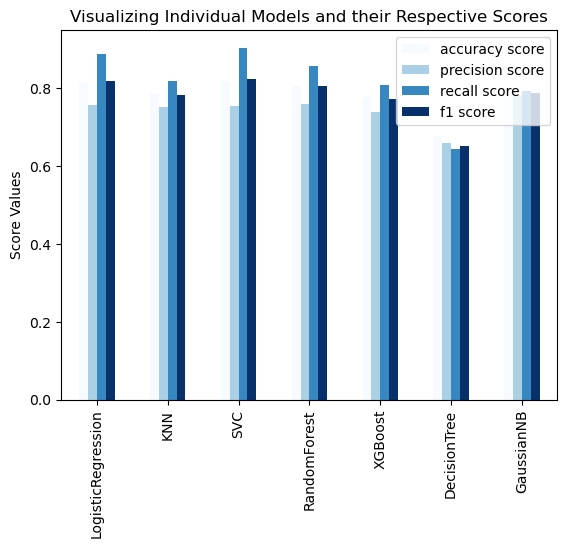

In [76]:
score_dict_pd.T.plot.bar(cmap = 'Blues')
plt.title('Visualizing Individual Models and their Respective Scores')
plt.ylabel('Score Values');

Seeing how the RandomForest although has the highest precsion score, we are more interested in the Recall and F1 score which the SVC and LogisticRegression has the highest in those metrics.

Model Summary: (Ranked in recall / f1 score)
1. **SVC** (go into hyperparameter tuning for more investigation)
2. **LogisticRegression** (go into hyperparameter tuning for more investigation)
3. LinearSVC (stop for now)
4. RandomForest (stop for now)
5. KNN (stop for now)
6. XGBoostClassifier (stop for now)


## 5. Hyperparameter Tuning

These steps below are only used for seeing the changes between the training data and the preprocessed training data after `LabelEncoding` and `StandardScaling`.

In [77]:
# using the same pipeline and column transformer strategy
cat_pipe = Pipeline(steps=[
            ('OrdEncode', OrdinalEncoder()),
            ('scaler', StandardScaler())
        ])
        
int_pipe = Pipeline(steps =[
            ('scaler', StandardScaler())
        ])
        
num_pipe = Pipeline(steps = [
            ('scaler', StandardScaler())
        ])
col_transformer = ColumnTransformer(transformers=[
            ('cat', cat_pipe, cat_features),
            ('num', num_pipe, float_features),
            ('int', int_pipe, int_features)])


In [78]:
# creating our new X_train and X_test data sets
X_train_fit = col_transformer.fit_transform(X_train)
X_test_fit = col_transformer.transform(X_test)

X_train data prior to encoding and standardization

In [79]:
X_train.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status
4962,Male,21575.0,0,0,Yes,Private,Rural,96.16,44.1,Missing
13446,Female,20815.0,0,1,Yes,Private,Urban,216.58,31.0,Missing
40203,Female,28878.0,0,1,Yes,Private,Urban,172.13,24.6,never smoked
37358,Male,21219.0,0,1,Yes,Private,Rural,63.26,29.6,never smoked
19828,Male,28870.0,1,0,Yes,Private,Urban,256.52,26.3,Missing


X_train data after encoding and standardization

In [80]:
X_train_ = pd.DataFrame(X_train_fit, index=X_train.index, columns=X_train.columns)
X_train_.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status
4962,1.155328,0.569466,-0.11297,-0.992579,-1.458831,0.236489,-0.341985,2.139857,-0.448712,-0.379170
13446,-0.865555,0.569466,-0.11297,1.007477,-1.458831,0.143073,1.935233,0.266805,-0.448712,2.637339
40203,-0.865555,0.569466,-0.11297,1.007477,0.530736,1.134144,1.094656,-0.648274,-0.448712,2.637339
37358,1.155328,0.569466,-0.11297,-0.992579,0.530736,0.192731,-0.964145,0.066631,-0.448712,2.637339
19828,1.155328,0.569466,-0.11297,1.007477,-1.458831,1.133161,2.690524,-0.405206,2.228602,-0.379170


### 5.1 Testing SVC model performance after Hyperparameter Tuning

We will use our `ModelEvaluator` class to fit our SVC model on our training dataset

In [81]:
# instantiating the ModelEvaluator Class for LinearSVC
svc = ModelEvaluator('SVC', X_train, X_test, y_train, y_test)

# preprocessing the data
svc.preprocessor(int_features, cat_features, float_features)
    
# fitting the LinearSVC model
svc.model_piper(SVC(probability = True, random_state = 42))

### 5.1.1 Re-instantitating the ModelEvaluator on SVC for recording inital metrics output

In [82]:
# getting the intial scores 
svc_model = svc.model_fit()

testing SVC...
it took 0.15755510330200195s to fit this model


In [83]:
svc.model_scorer()

{'accuracy score': 0.8178438661710037,
 'precision score': 0.7549668874172185,
 'recall score': 0.9047619047619048,
 'f1 score': 0.8231046931407943}

In [84]:
print(svc.model_report())

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       143
           1       0.75      0.90      0.82       126

    accuracy                           0.82       269
   macro avg       0.83      0.82      0.82       269
weighted avg       0.83      0.82      0.82       269



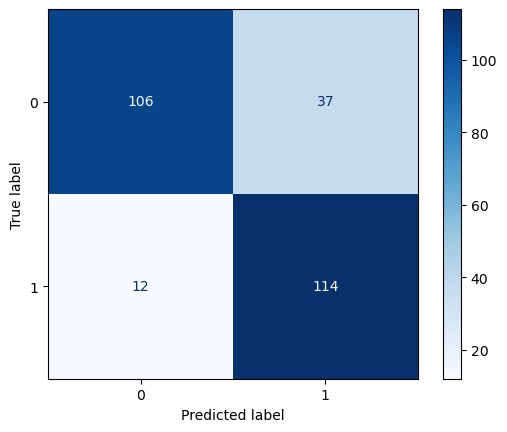

In [85]:
svc.plot_confusion_matrix()

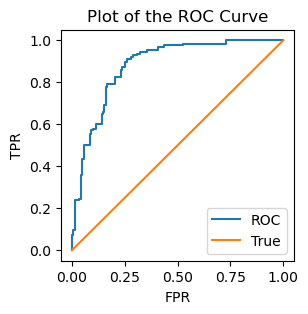

In [86]:
svc.plot_roc_curve()

In [87]:
svc.get_auc_score()

0.8809523809523809

In [88]:
svc.get_params()

,Model Params
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


### 5.1.2 Hypertuning the SVC Model with Grid Search
Creating a grid for the GridSearchCV hyperparameter tuning

In [89]:
# criteria of parameters:
svc_c = np.logspace(-4,4,20)
svc_gamma = ['scale', 'auto']
svc_kernel = ['linear', 'rbf']
svc_proba = [True]
svc_degree = [3]

# grid of linearSVC params
svc_grid = {'model__C': svc_c,
           'model__gamma': svc_gamma,
           'model__kernel': svc_kernel,
           'model__degree': svc_degree,
           'model__probability': svc_proba}
gs_svc_model = GridSearchCV(svc_model,
                           param_grid=svc_grid,
                           verbose=True,
                           cv = 5,
                           n_jobs=-1)

Fitting the GridSearchCV model

In [90]:
gs_svc_model.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transfomer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('OrdEncode',
                                                                                          OrdinalEncoder()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gender',
                                                                          'Ever_Married',
                                                                          'Type_Of_Work',
                                                                          'Residence',
                                                                          'Smoking_Status']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age_In_Days',
                                                                          'Avg_Glucose',
                                                                          'BMI']),
                                                                        ('int',
                                                                         Pipe...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'model__degree': [3],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'rbf'],
                         'model__probability': [True]},
             verbose=True)

In [91]:
print(model_report(gs_svc_model, X_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       143
           1       0.75      0.90      0.82       126

    accuracy                           0.81       269
   macro avg       0.82      0.82      0.81       269
weighted avg       0.83      0.81      0.81       269



**Evaluating the GridSearch model** : SVC

In [92]:
model_scorer(gs_svc_model, X_test, y_test)

{'accuracy score': 0.8104089219330854,
 'precision score': 0.7450980392156863,
 'recall score': 0.9047619047619048,
 'f1 score': 0.8172043010752689}

In [93]:
gs_svc_model.best_params_

{'model__C': 0.03359818286283781,
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'linear',
 'model__probability': True}

In [94]:
roc_auc_score(y_test, gs_svc_model.best_estimator_.predict_proba(X_test)[:,1])

0.8691308691308691

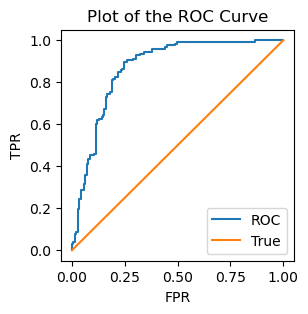

In [95]:
plot_roc_curve(gs_svc_model, X_test, y_test)

In [96]:
recall_score(y_test, gs_svc_model.best_estimator_.predict(X_test))

0.9047619047619048

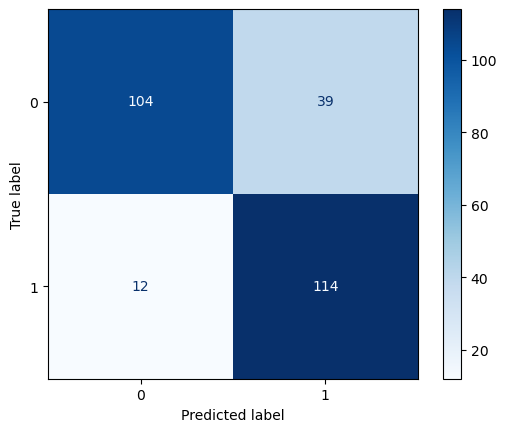

In [97]:
plot_confusion_matrix(gs_svc_model, X_test, y_test)

### 5.2 Testing LogisticRegression model performance after Hyperparameter Tuning
### 5.2.1 Re-instantitating the ModelEvaluator on LogisticRegression for recording inital metrics output

In [98]:
# instantiating the ModelEvaluator Class for LogisticRegression
log_reg = ModelEvaluator('LogisticRegression',  X_train, X_test, y_train, y_test)

# preprocessing the data
log_reg.preprocessor(int_features, cat_features, float_features)
    
# fitting the LogisticRegression model
log_reg.model_piper(LogisticRegression(random_state=42))

In [99]:
# initial score of the logistic model
log_model = log_reg.model_fit()
log_reg.model_scorer()

testing LogisticRegression...
it took 0.19587302207946777s to fit this model


{'accuracy score': 0.8141263940520446,
 'precision score': 0.7567567567567568,
 'recall score': 0.8888888888888888,
 'f1 score': 0.8175182481751826}

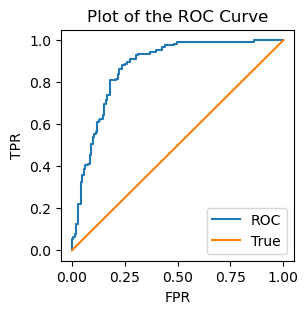

In [100]:
log_reg.plot_roc_curve()

In [101]:
log_reg.get_auc_score()

0.8720723720723721

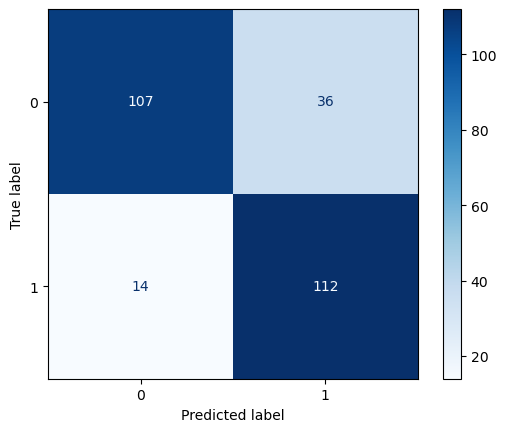

In [102]:
log_reg.plot_confusion_matrix()

In [103]:
print(log_reg.model_report())

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       143
           1       0.76      0.89      0.82       126

    accuracy                           0.81       269
   macro avg       0.82      0.82      0.81       269
weighted avg       0.82      0.81      0.81       269



In [104]:
log_reg.get_params()

,Model Params
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


### 5.2.2 Hypertuning the LogisticRegression with Grid Search

In [105]:
# criteria of parameters 
log_c = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18] 
log_solver = ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']
log_penalty = ['None', 'l1', 'l2', 'elasticnet']
log_max_iter = [80,100,150,200]

# grid of LogisticRegression params
log_grid = {'model__C': log_c,
           'model__solver': log_solver,
           'model__penalty': log_penalty,
           'model__max_iter': log_max_iter}

gs_log_model = GridSearchCV(log_model,
                           param_grid=log_grid,
                           verbose=True,
                           cv = 5,
                           n_jobs=-1)

Fitting the GridSearchCV Model

In [106]:
gs_log_model.fit(X_train, y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transfomer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('OrdEncode',
                                                                                          OrdinalEncoder()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gender',
                                                                          'Ever_Married',
                                                                          'Type_Of_Work',
                                                                          'Residence',
                                                                          'Smoking_Status']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age_In_Days',
                                                                          'Avg_Glucose',
                                                                          'BMI']),
                                                                        ('int',
                                                                         Pipe...
                                                                         ['Hypertension',
                                                                          'Heart_Disease'])])),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                                      2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,
                                      15, 16, 16.5, 17, 17.5, 18],
                         'model__max_iter': [80, 100, 150, 200],
                         'model__penalty': ['None', 'l1', 'l2', 'elasticnet'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']},
             verbose=True)

**Evaluating the GridSearch model** : LogisticRegression

In [107]:
model_scorer(gs_log_model,X_test, y_test)

{'accuracy score': 0.8141263940520446,
 'precision score': 0.7567567567567568,
 'recall score': 0.8888888888888888,
 'f1 score': 0.8175182481751826}

In [108]:
gs_log_model.best_params_

{'model__C': 0.3,
 'model__max_iter': 80,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [109]:
print(model_report(gs_log_model, X_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       143
           1       0.76      0.89      0.82       126

    accuracy                           0.81       269
   macro avg       0.82      0.82      0.81       269
weighted avg       0.82      0.81      0.81       269



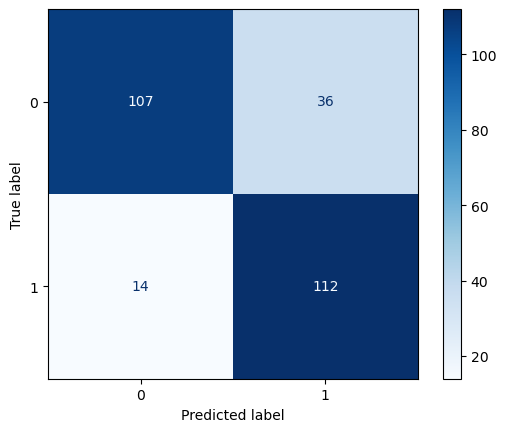

In [110]:
plot_confusion_matrix(gs_log_model, X_test, y_test)

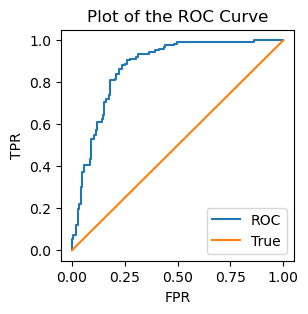

In [111]:
plot_roc_curve(gs_log_model, X_test, y_test)

In [112]:
roc_auc_score(y_test, gs_log_model.best_estimator_.predict_proba(X_test)[:,1])

0.8720723720723721

In [113]:
recall_score(y_test, gs_log_model.best_estimator_.predict(X_test))

0.8888888888888888

### 5.3 Testing RandomForestClassifier performance after Hyperparameter Tuning

### 5.3.1 Re-instantitating the ModelEvaluator on RandomForest for recording inital metrics output

In [114]:
# instantiating the ModelEvaluator Class for RandomForest
rf_model = ModelEvaluator('RandomForest',  X_train, X_test, y_train, y_test)

# preprocessing the data
rf_model.preprocessor(int_features, cat_features, float_features)
    
# fitting the RandomForest model
rf_model.model_piper(RandomForestClassifier(random_state=42))

In [115]:
rf = rf_model.model_fit()

testing RandomForest...
it took 0.24001002311706543s to fit this model


In [116]:
rf_model.model_scorer()

{'accuracy score': 0.8066914498141264,
 'precision score': 0.7605633802816901,
 'recall score': 0.8571428571428571,
 'f1 score': 0.8059701492537313}

In [117]:
print(rf_model.model_report())

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       143
           1       0.76      0.86      0.81       126

    accuracy                           0.81       269
   macro avg       0.81      0.81      0.81       269
weighted avg       0.81      0.81      0.81       269



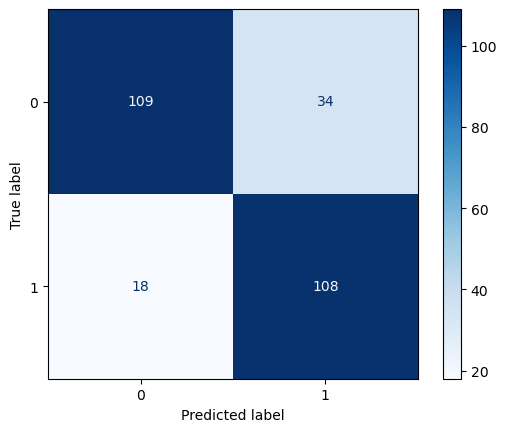

In [118]:
rf_model.plot_confusion_matrix()

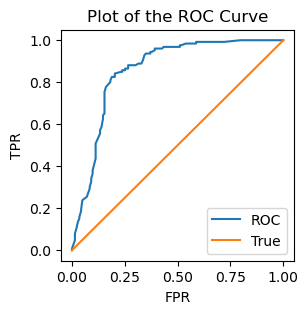

In [119]:
rf_model.plot_roc_curve()

In [120]:
rf_model.get_auc_score()

0.8576423576423576

In [121]:
rf_model.get_params()

,Model Params
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


### 5.3.2 Hypertuning the RandomForest with Grid Search

In [122]:
# Number of trees in random forest
n_estimators = [200, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [1, 5, 10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


rf_grid = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf}

rs_rf_model = GridSearchCV(rf,
                           param_grid=rf_grid,
                           verbose=True,
                           cv = 5,
                           n_jobs=-1)

Fitting the GridSearchCV model

In [123]:
rs_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transfomer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('OrdEncode',
                                                                                          OrdinalEncoder()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gender',
                                                                          'Ever_Married',
                                                                          'Type_Of_Work',
                                                                          'Residence',
                                                                          'Smoking_Status']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age_In_Days',
                                                                          'Avg_Glucose',
                                                                          'BMI']),
                                                                        ('int',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Hypertension',
                                                                          'Heart_Disease'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [1, 5, 10, None],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [200, 500]},
             verbose=True)

**Evaluating the GridSearch model** : RandomForestClassifier

In [124]:
print(model_report(rs_rf_model, X_test, y_test))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       143
           1       0.71      0.90      0.80       126

    accuracy                           0.78       269
   macro avg       0.80      0.79      0.78       269
weighted avg       0.81      0.78      0.78       269



In [125]:
rs_rf_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 200}

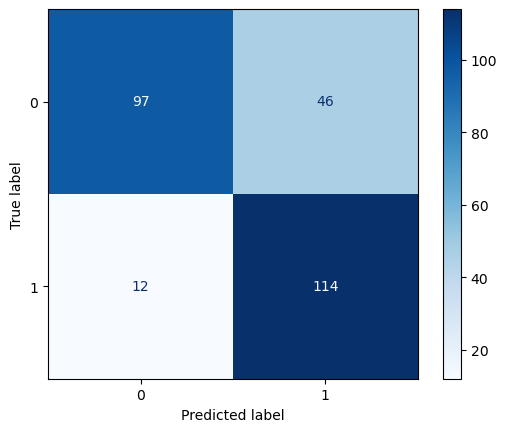

In [126]:
plot_confusion_matrix(rs_rf_model, X_test, y_test)

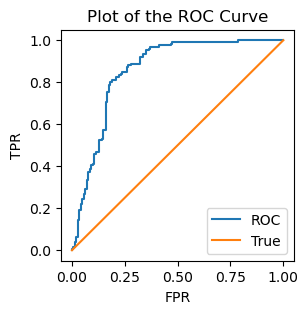

In [127]:
plot_roc_curve(rs_rf_model, X_test, y_test)

In [128]:
roc_auc_score(y_test, rs_rf_model.best_estimator_.predict_proba(X_test)[:,1])

0.8578643578643579

In [129]:
recall_score(y_test, rs_rf_model.best_estimator_.predict(X_test)) 

0.9047619047619048

## 6. Feature Importance and Summary

### 6.1 Feature Importance for Logistic Regression Model

First we define a function that will output a graph of feature_importances for each model

In [130]:
def plot_features(model_name, columns, model, X_test, y_test):
    '''
    creating a feature importances visualization
    '''
    # creating an importance variable
    result = permutation_importance(model, X_test, y_test, random_state=42 )
    
    # creating a dataframe for visualizing importance
    df = (pd.DataFrame({'Features': columns,
                       'Feature_Importances': result.importances_mean})
         .sort_values('Feature_Importances', ascending = False)
         .reset_index(drop=True))
    
    # plotting the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['Features'], df['Feature_Importances'])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importances Value')
    ax.invert_yaxis()
    fig.suptitle(f'{model_name}: Permutation Feature Importance');

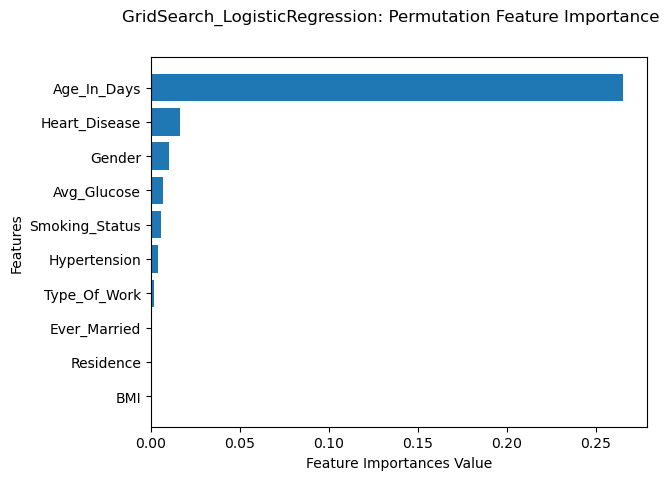

In [131]:
model_name = 'GridSearch_LogisticRegression'
plot_features(model_name, X_train.columns, gs_log_model, X_test, y_test)

### 6.2  Feature Importance for SVC Model

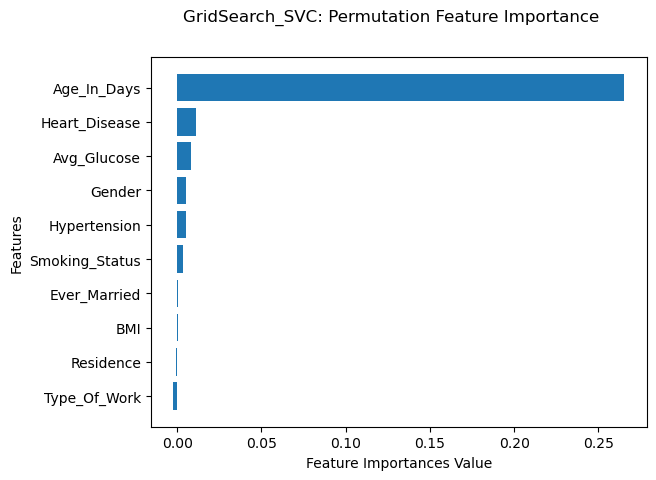

In [132]:
model_name = 'GridSearch_SVC'
plot_features(model_name, X_train.columns, gs_svc_model, X_test, y_test)

### 6.3 Feature Importance for RandomForestModel

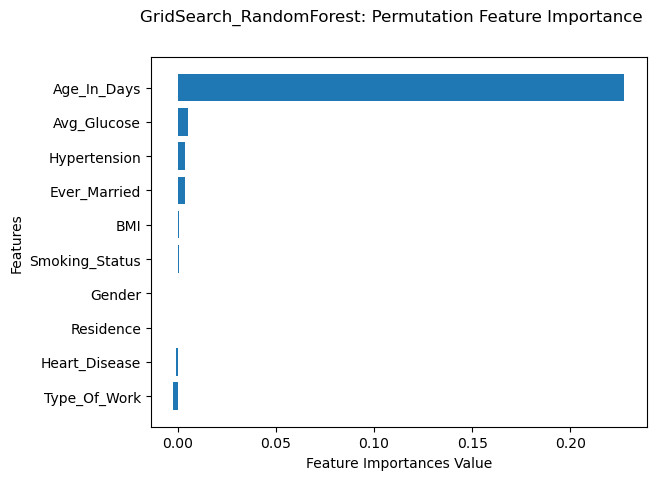

In [133]:
model_name = 'GridSearch_RandomForest'
plot_features(model_name, X_train.columns, rs_rf_model, X_test, y_test)

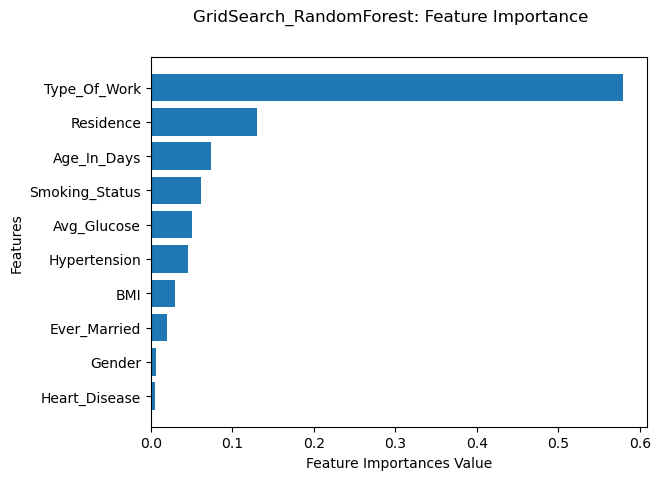

In [134]:
df = (pd.DataFrame({'Features': X_train.columns,
                       'Feature_Importances': rs_rf_model.best_estimator_.named_steps['model'].feature_importances_})
         .sort_values('Feature_Importances', ascending = False)
         .reset_index(drop=True))
    
# plotting the dataframe
fig, ax = plt.subplots()
ax.barh(df['Features'], df['Feature_Importances'])
ax.set_ylabel('Features')
ax.set_xlabel('Feature Importances Value')
ax.invert_yaxis()
fig.suptitle(f'{model_name}: Feature Importance');

Using the permutation_importances functionm, which is a model-agnostic measurement (although not a predictive indicator, it does output a value of its importance in terms of model error improvement), showed that `Age_In_Days` is very important to the fitting of the model. `RandomForestClassifier` also seem to have quite the differing importances when compared to the other two. 

# Project Summary

Steps that I have completed for this project includes:
1. Data Cleaning and Wrangling
2. Feature Engineering
3. Exploratory Data and Statistical Analysis
4. Model Evaluation
5. Hyperparameter Tuning
6. Feature Importance

### Recommendations:
**Recommendation 1**: Because the SVC model had the highest starting metrics (in recall particularly because this measures the ability to find all relevant instances of a class) it might be worthwhile to experiment with this model further and tune its hyperparameters. 

**Recommendation 2**: However, if no improvement is seen with SVC, it might also be worthwhile to look at the RandomForestClassifier, because this model had the greatest change during the first phase of hyperparameter tuning (4% increase in recall)


### Next Steps:
The modeling portion of this project was very exciting and fruitful. Having the opportunity to work with data for the proposed goal of stroke diagnosis and potentially improving health care was a rewarding experience.

Because the experimentation and machine learning optimization for classification problems portions of this assignment can be a cyclic process of repeated improving and tweaking, there are many steps that I have yet to explore due to the project time constraint.

1. Optimize the model further with a broader range of values for Grid Search to optimize these three models first, then potentially include the other models, as well as models that were not included in the list. 
    * With the way this notebook is structured, it will be simple to go back and experiment with other choices (changing the way the unbalanced classes are handled and/or removing columns that are deemed irrelevant).
    * Consider even including new features (such as Race/Ethnicity or Family history) either through changing collection methods or feature engineering: ie. Considering that Type_Of_Work might be a variable that measure one modality of stress and use that information to either create a new feature or design a feature through merging multiple correlated columns.
    * In order to more accurately capture the distribution of class data it might be also important to optimize the model on the imbalanced class data (original) and emphasize the class_weights parameter for each model, since this more accurately resembles the real-world situation.

2. After optimizing the model further using the proposed methods, and perhaps after discussion with experts / client, it would be great to deploy this model using a web application framework such as Flask or Django or even in Shiny to make this model more accessible for hospital use during stroke treatment recommendation for patients.
